In [21]:
import sys
from os.path import abspath, join, dirname
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt


fifo_path = join(dirname(abspath(".")), 'SCHED_FIFO_time_log.csv')
rr_path = join(dirname(abspath(".")), 'SCHED_RR_time_log.csv')
other_path = join(dirname(abspath(".")), 'SCHED_OTHER_time_log.csv')

sh_other_path = join(dirname(abspath(".")), 'shared_durations.csv')

# shared memory

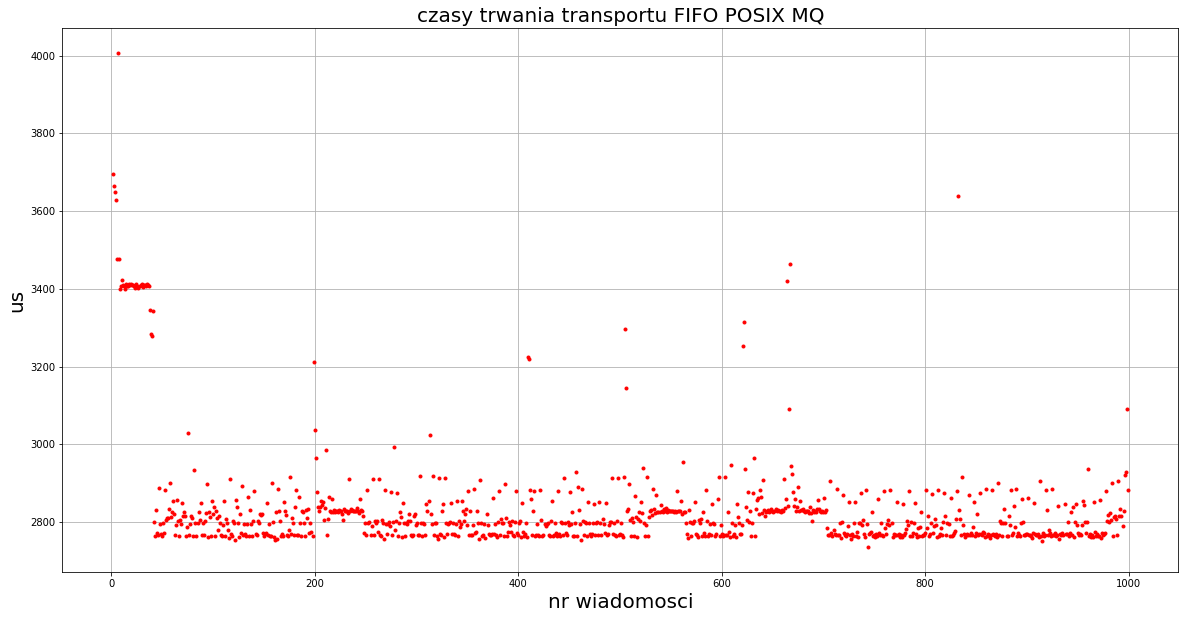

In [18]:
with open(sh_other_path, 'r') as f:
    data = pd.read_csv(f)

transfer_dur = data['durations[us]']
#transfer_dur = transfer_dur[2:len(transfer_dur)]

fig = plt.figure(figsize=(20,10))
plt.plot(transfer_dur[2:len(transfer_dur)], 'r.')
plt.grid(True)
plt.title('czasy trwania transportu FIFO POSIX MQ', fontsize=20)
plt.xlabel('nr wiadomosci', fontsize=20)
plt.ylabel('us', fontsize=20)
plt.savefig('wykres_shared.png')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.hist(transfer_dur[3:len(transfer_dur)], bins=100)
plt.title('histogram czasow transportu OTHER SHARED MEM', fontsize=20)
plt.xlabel('czas transportu [us]', fontsize=15)
plt.savefig('hist_shared.png')
plt.show()

# FIFO

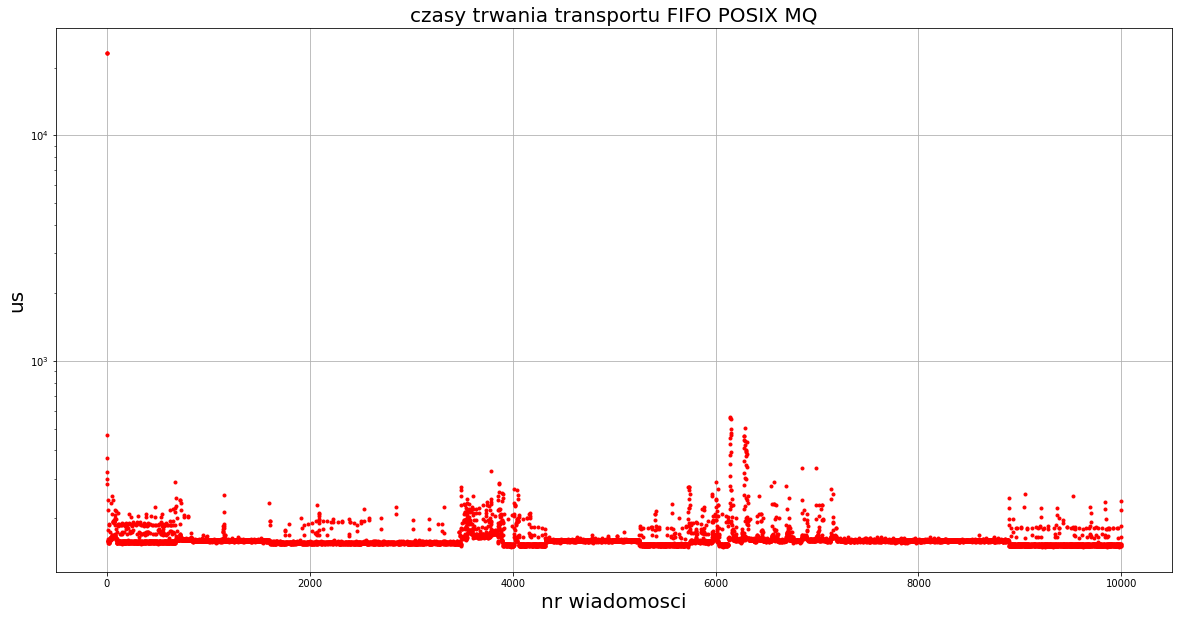

In [42]:

with open(fifo_path, 'r') as f:
    data = pd.read_csv(f)

transfer_dur = data['transfer_duration[us]']
#transfer_dur = transfer_dur[2:len(transfer_dur)]

fig = plt.figure(figsize=(20,10))
plt.semilogy(transfer_dur, 'r.')
plt.grid(True)
plt.title('czasy trwania transportu FIFO POSIX MQ', fontsize=20)
plt.xlabel('nr wiadomosci', fontsize=20)
plt.ylabel('us', fontsize=20)
plt.savefig('wykres_fifo_mq.png')
plt.show()

In [43]:
max_opoznienie = np.max(transfer_dur[3:len(transfer_dur)])
print(f'max opoznienie [us]: {max_opoznienie}')

avg_dur = np.mean(transfer_dur[3:len(transfer_dur)])
print(f'sredni czas transferu [us] = {avg_dur}')

std_dur = np.std(transfer_dur[3:len(transfer_dur)])
print(f'odchylenie st. czasu transferu = {std_dur}')
with open('dane_shared.txt', 'w') as f:
    f.write("max_opoznienie: " + str(max_opoznienie) + "\nsredni czas transferu: " + str(avg_dur) + "\nstd: "+ str(std_dur))
    

max opoznienie [us]: 565
sredni czas transferu [us] = 161.48544563369012
odchylenie st. czasu transferu = 20.433706813650364


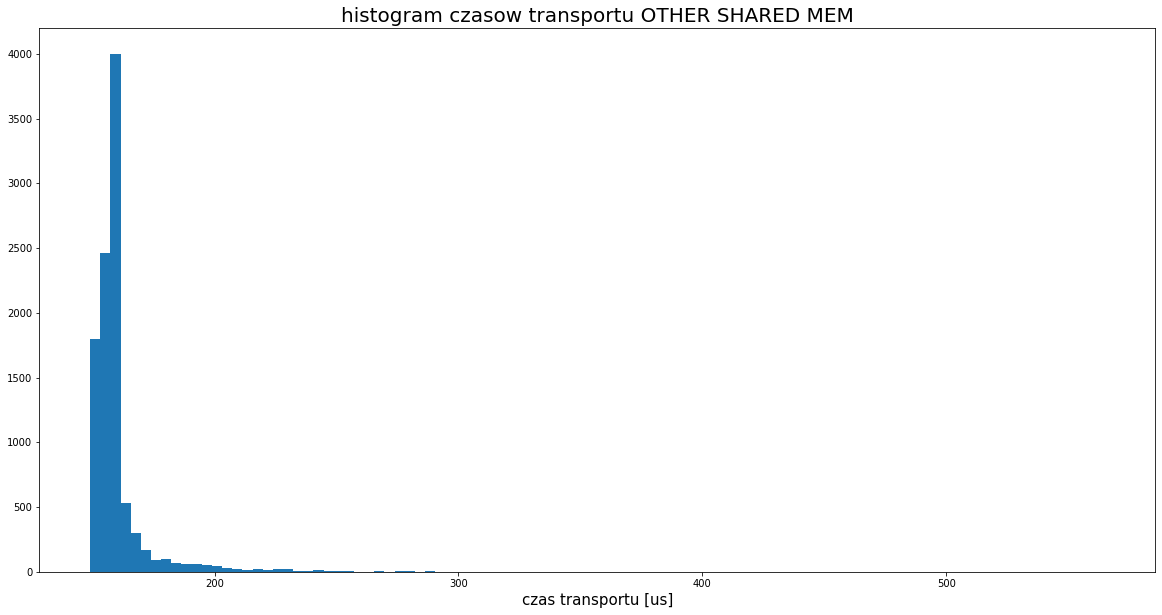

In [44]:
fig = plt.figure(figsize=(20,10))
plt.hist(transfer_dur[5:len(transfer_dur)], bins=100)
plt.title('histogram czasow transportu OTHER SHARED MEM', fontsize=20)
plt.xlabel('czas transportu [us]', fontsize=15)
plt.show()

In [45]:
max_opoznienie = np.max(transfer_dur)
print(f'max opoznienie [us]: {max_opoznienie}')

avg_dur = np.mean(transfer_dur)
print(f'sredni czas transferu [us] = {avg_dur}')

std_dur = np.std(transfer_dur)
print(f'odchylenie st. czasu transferu = {std_dur}')


max opoznienie [us]: 23245
sredni czas transferu [us] = 168.4057
odchylenie st. czasu transferu = 400.00328512088726


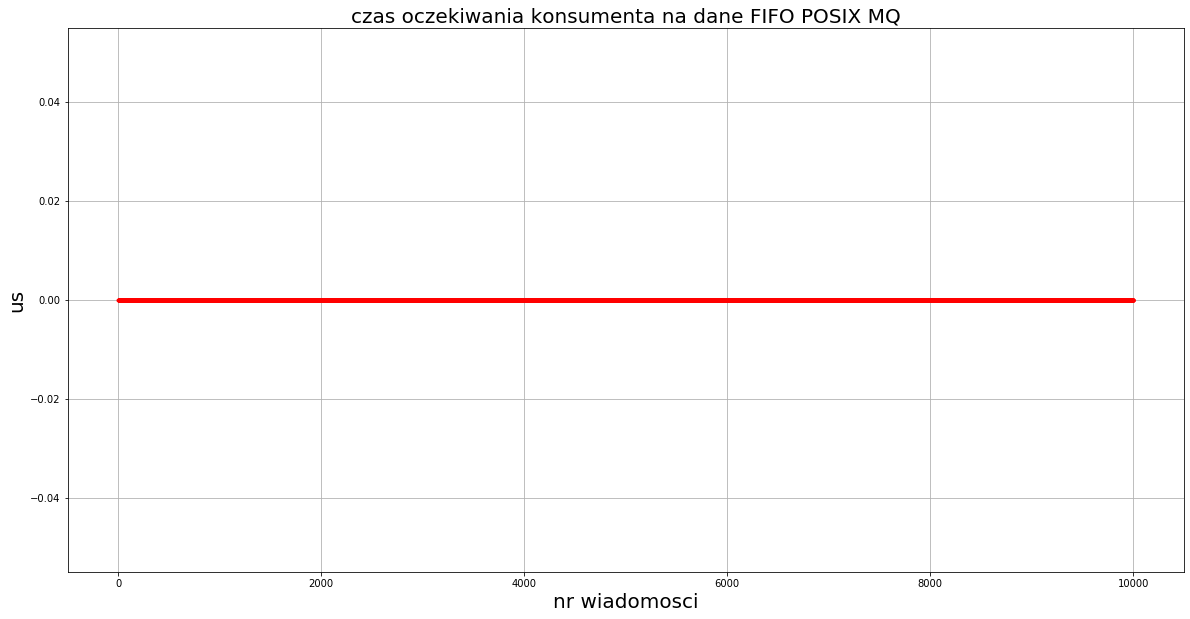

In [48]:
waiting_times = data['waiting_time[ms]']

fig = plt.figure(figsize=(20,10))
plt.plot(waiting_times[2:len(waiting_times)], 'r.')
plt.grid(True)
plt.title('czas oczekiwania konsumenta na dane FIFO POSIX MQ', fontsize=20)
plt.xlabel('nr wiadomosci', fontsize=20)
plt.ylabel('us', fontsize=20)
plt.show()

0.0

# SCHED_RR

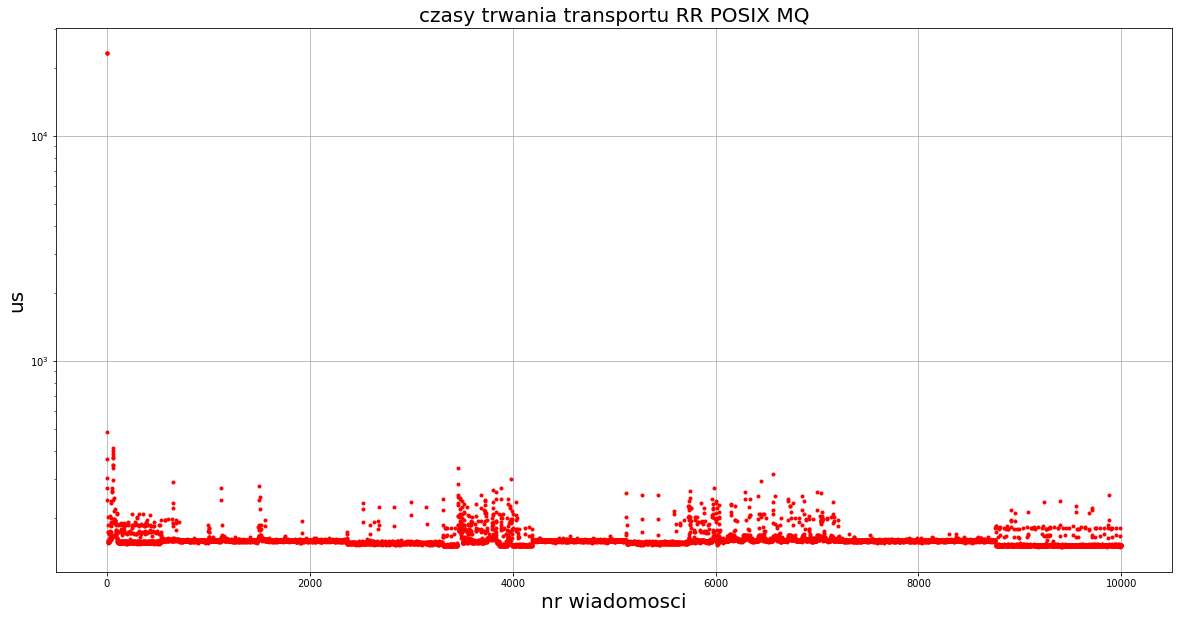

In [50]:

with open(rr_path, 'r') as f:
    data = pd.read_csv(f)
    
transfer_dur = data['transfer_duration[us]']
#transfer_dur = transfer_dur[2:len(transfer_dur)]

fig = plt.figure(figsize=(20,10))
plt.semilogy(transfer_dur, 'r.')
plt.grid(True)
plt.title('czasy trwania transportu RR POSIX MQ', fontsize=20)
plt.xlabel('nr wiadomosci', fontsize=20)
plt.ylabel('us', fontsize=20)
plt.savefig('wykres_rr_mq.png')
plt.show()

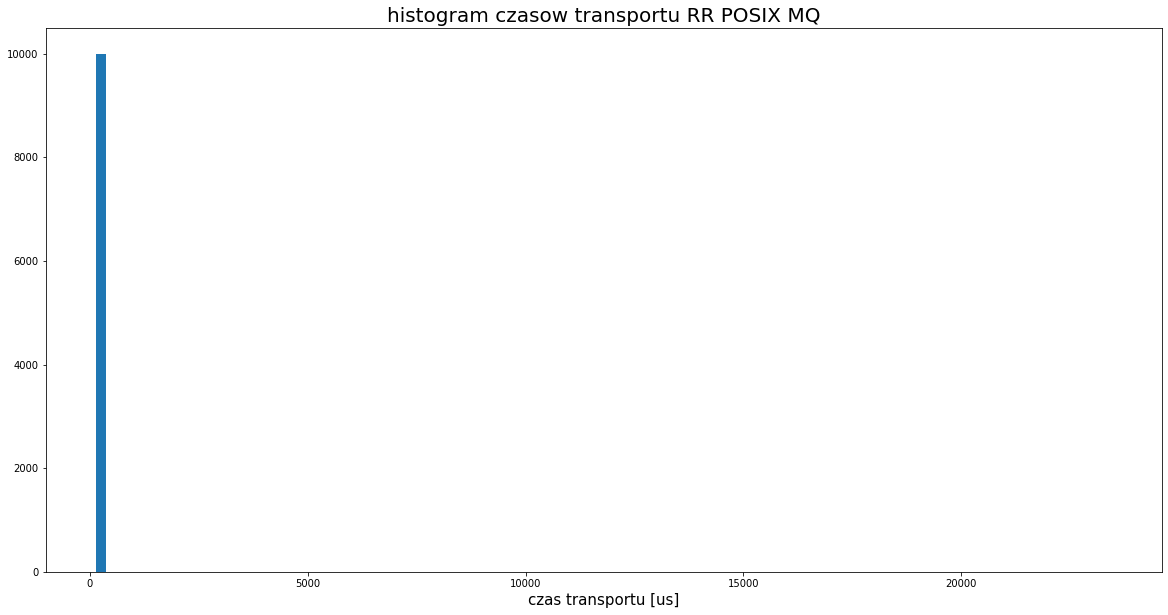

In [27]:
fig = plt.figure(figsize=(20,10))
plt.hist(transfer_dur, bins=100)
plt.title('histogram czasow transportu RR POSIX MQ', fontsize=20)
plt.xlabel('czas transportu [us]', fontsize=15)
plt.show()

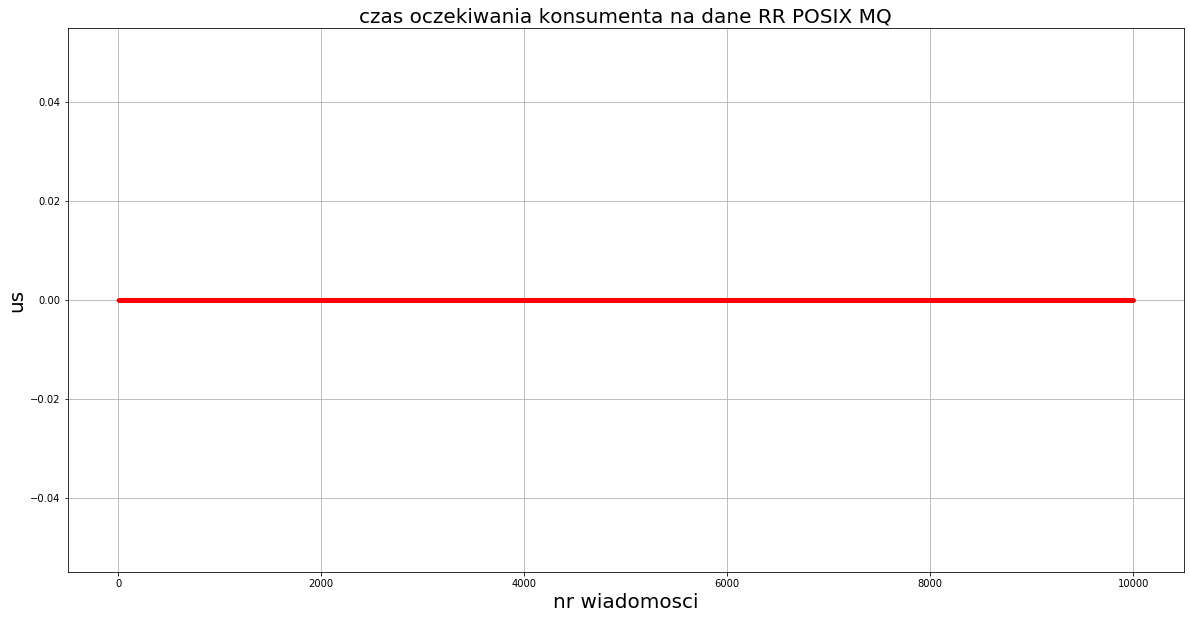

In [137]:
waiting_times = data['waiting_time[ms]']

fig = plt.figure(figsize=(20,10))
plt.plot(waiting_times[2:len(waiting_times)], 'r.')
plt.grid(True)
plt.title('czas oczekiwania konsumenta na dane RR POSIX MQ', fontsize=20)
plt.xlabel('nr wiadomosci', fontsize=20)
plt.ylabel('us', fontsize=20)
plt.show()